In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from scipy.io import arff
import pandas as pd

In [46]:
import numpy as np

In [20]:
import matplotlib.pyplot as plt

In [5]:
train1,train2 = arff.loadarff('../data/Epilepsy_TRAIN.arff')

In [6]:
train_df = pd.DataFrame(train1)

In [59]:
type(train2)

scipy.io.arff.arffread.MetaData

In [54]:
x_tuple = list(train_df.iloc[0,:][0][0])

In [55]:
x_tuple = np.array(x_tuple)


In [57]:
x_tuple.shape

(206,)

In [60]:
y_tuple = list(train_df.iloc[0,:][0][1])
y_tuple = np.array(y_tuple)

In [61]:
z_tuple = list(train_df.iloc[0,:][0][2])
z_tuple = np.array(z_tuple)

In [34]:
time = list(range(0,len(x_tuple)))

In [35]:
len(time)

206

**What does one random sample in its raw state look?**

''

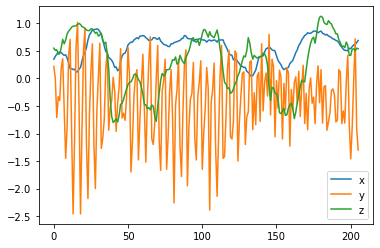

In [385]:
fig, axs = plt.subplots()
axs.plot(time,x_tuple, label='x')
axs.plot(time,y_tuple, label='y')
axs.plot(time,z_tuple, label='z')
plt.legend()
;

**in the real world the accelormeter data may come from a smart watch. what if that watch is slightly spun around the wrist? will the sample look completly different? lets look.**

In [73]:
#rotatation around z axis
def rot_matrix_z(x,y,z,theta):
    '''performs a theta degree rotation around the x axis of any three demetional point in space'''
    '''inputs:
            x : <float, y: <float>,  z: <float>
            theta: degrees
       output:
           new x y z 
           '''
    theta_rad = theta/57.2958
    rot_matrix = np.array([[np.cos(theta),-np.sin(theta), 0],
                               [np.sin(theta),np.cos(theta), 0],
                              [0, 0, 1]])
    
    
    return np.array([x,y,z])@rot_matrix

In [386]:
y = np.reshape(y_tuple,(1,-1))[0]
z = np.reshape(z_tuple,(1,-1))[0]

In [387]:
# rotate the three x,y,z arrays and save them in new x,y,z arrays
def rotate_xyz(x_array,y_array,z_array,theta):
    x_rot = np.array([])
    y_rot = np.array([])
    z_rot = np.array([])
    for i in range(len(x_array)):
        #print(x_array[i])
        new_point = rot_matrix_z(x=x_array[i],y=y_array[i],z=z_array[i],theta=theta)
        #print(new_point[0])
        #print(type(new_point[0]))
        x_rot = np.append(x_rot,new_point[0])
        #print(x_rot)
        y_rot = np.append(y_rot,new_point[1])
        z_rot = np.append(z_rot,new_point[2])
    return x_rot,y_rot,z_rot

In [388]:
x_45,y_45,z_45 = rotate_xyz(x,y,z,theta=45)

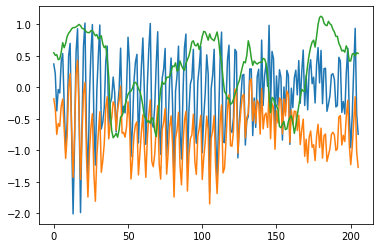

In [389]:
fig, axs = plt.subplots()
axs.plot(time,x_45, label='x')
axs.plot(time,y_45, label='y')
axs.plot(time,z_45, label='z')

**Lets plot the sample in cartesian coordinants raw next to rotated for comparision**

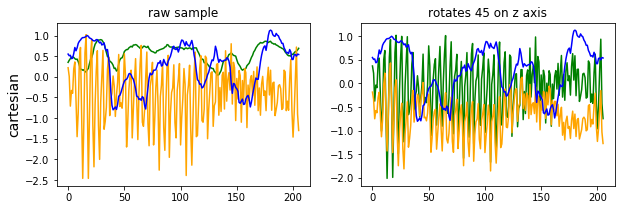

In [197]:
###ploting sample one with next to its self rotataed 45 arounf z_axis(wrist)
fig, axs = plt.subplots(1,2,figsize=(10,3))
axs[0].plot(x,color="green")
axs[0].plot(y,color='orange')
axs[0].plot(z,color='blue')

axs[1].plot(x_45,color="green")
axs[1].plot(y_45,color='orange')
axs[1].plot(z_45,color='blue')

axs[0].set_ylabel('cartesian',size=14)
axs[0].set_title('raw sample')
axs[1].set_title('rotates 45 on z axis');
    

**there are big differenced in the x and y if the acceleromter is switsed about the wrist. I speculate that changinf coordinant space and using the rho part will retain information from x, y, and z but look the same when acceleromter is spun. lets check  it out**

In [198]:
##convert to the rho component of polar coordinance
def to_rho(x,y,z):
    rho = np.sqrt(x**2 + y**2 + z**2)
    return rho
    

In [202]:
## convert x,y,and z array to rho array
def cart_to_polar(x_array,y_array,z_array):
    rho = np.array([])
    for i in range(len(x_array)):
        rho = np.append(rho,to_rho(x_array[i],y_array[i],z_array[i]))
    return rho


In [203]:
rho_raw = cart_to_polar(x,y,z)

In [206]:
rho_45 = cart_to_polar(x_45,y_45,z_45)

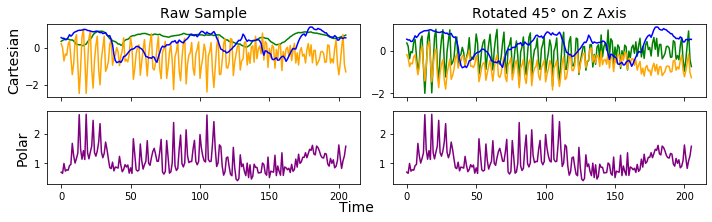

In [245]:
fig, axs = plt.subplots(2,2,figsize=(10,3),sharex=True)
axs[0][0].plot(x,color="green")
axs[0][0].plot(y,color='orange')
axs[0][0].plot(z,color='blue')

axs[0][1].plot(x_45,color="green")
axs[0][1].plot(y_45,color='orange')
axs[0][1].plot(z_45,color='blue')

degree_sign = u"\N{DEGREE SIGN}"
axs[0][0].set_ylabel('Cartesian',size=14)
axs[0][0].set_title('Raw Sample',size=14)
axs[0][1].set_title(f'Rotated 45{degree_sign} on Z Axis',size=14)

axs[1][0].plot(rho_raw,color="purple")
axs[1][1].plot(rho_45,color="purple")

axs[1][0].set_ylabel('Polar',size=14)
fig.text(0.5, -.0, 'Time', ha='center',size=14)

plt.tight_layout()

#plt.savefig('../images/compare_coords.png')

**The polar transformed sample doea not look diffent when accelerometer is rotated 45 degrees, so I will make a new dataframe that is completelt transformed into the rho part of polar coordinance.**

In [379]:

def df_to_rho(df):
    rho_df = np.empty((0,206))
    
    ### for each row
    for row in df.iterrows():
        
        ### create x y z from each row
        x_array= list(row[1][0][0])
        x_array = np.array(x_array)
        x_array = np.reshape(x_array,(1,-1))#[0]
        
        y_array = list(row[1][0][1])
        y_array = np.array(y_array)
        y_array = np.reshape(y_array,(1,-1))#[0]
        
        z_array = list(row[1][0][2])
        z_array = np.array(z_array)
        z_array = np.reshape(z_array,(1,-1))#[0]
        
        #make a new sample that is just rho
        rho = cart_to_polar(x_array,y_array,z_array)
        rho = np.reshape(rho,(1,-1))
       #creat new df convertes to just the rho element of polar coordinanace
    
        rho_df = np.append(rho_df, rho,axis=0)

    return rho_df




In [380]:
rho_df_train = df_to_rho(train_df)

In [382]:
rho_df_train.shape

(137, 206)

In [383]:
type(rho_df_train)

numpy.ndarray

In [392]:
from tslearn.clustering import TimeSeriesKMeans

/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


why use DTW as a distance metric in time series clustering https://tslearn.readthedocs.io/en/stable/user_guide/clustering.html 

**Lets make an elbow plot to cheecek for the number of clusters**

''

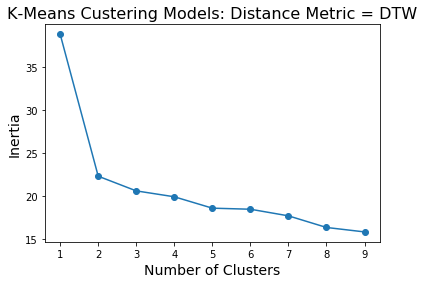

In [395]:
inertias = []                                                
for i in range(1,10):
    km = TimeSeriesKMeans(n_clusters=i,
                         metric='dtw',
                         random_state=666)
    km.fit(rho_df_train)
    inertias.append(km.inertia_)
plt.plot(range(1,10),inertias,marker='o')
plt.xlabel('Number of Clusters',size=14)
plt.ylabel('Inertia', size=14)
plt.title('K-Means Custering Models: Distance Metric = DTW',size=16)
plt.savefig('../images/elbow_dtw.png')

;

**lets see if 2, 3, or 4 clusters looks better on a siluette plots**

In [396]:
from sklearn.metrics import  silhouette_samples

In [397]:
km2 = TimeSeriesKMeans(n_clusters=2,
                         metric='dtw')

In [398]:
km3 = TimeSeriesKMeans(n_clusters=3, metric="dtw")

In [399]:
km4 = TimeSeriesKMeans(n_clusters=4, metric="dtw") 

In [400]:
y_km2 = km2.fit_predict(rho_df_train)

In [401]:
y_km3 = km3.fit_predict(rho_df_train)

In [402]:
y_km4 = km4.fit_predict(rho_df_train)

In [403]:
cluster_labels_2 = np.unique(y_km2)

In [404]:
cluster_labels_3 = np.unique(y_km3)

In [405]:
cluster_labels_4 = np.unique(y_km4)

In [406]:
from matplotlib import cm

In [409]:
from tslearn.clustering import silhouette_score

In [413]:
def make_sil_plot(x,y,metric):
    cluster_labels = np.unique(y)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_score(x,y,metric=metric)
    y_ax_lower, y_ax_upper = 0,0
    yticks = []
    for i ,c in enumerate(cluster_labels):
        breakpoint()
        c_silhouette_vals = silhouette_vals[y==c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i)/n_clusters)
        plt.barh(range(y_ax_lower,y_ax_upper),
                c_silhouette_vals,
                height=1.0,
                edgecolor='none',
                color=color)
        yticks.append((y_ax_lower + y_ax_upper)/2.)
        y_ax_lower += len(c_silhouettte_vals)
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg,
               color='red',
               linestyle='--')
    plt.yticks(yticks,cluster_labels +1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    

In [ ]:
make_sil_plot(rho_df_train,y_km2,metric='dtw')

> <ipython-input-413-1b24a4e21983>(9)make_sil_plot()
-> c_silhouette_vals = silhouette_vals[y==c]
(Pdb) print(c)
0
(Pdb) printy
*** NameError: name 'printy' is not defined
(Pdb) print(y)
[1 1 1 1 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
(Pdb) silhouette_vals
0.47733409648406333


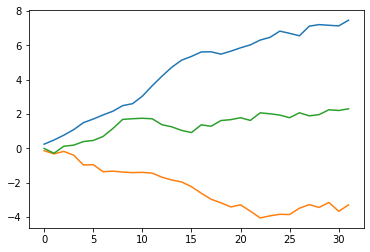

In [13]:
for i in range(3):
    plt.plot(km.cluster_centers_[i])

In [14]:
from tslearn.utils import to_time_series

In [18]:
a = to_time_series([[1,2,3],[3,4,5]])

In [19]:
a.shape

(2, 3)

In [20]:
b =to_time_series([ [[1,2,3],[4,5,8]],[3,4,5]])

ValueError: setting an array element with a sequence.